In [1]:
# best 3 solutions based on EXP1 in turns of f1 weighted is:
# XGBcls, RoadNet+Segment NO_TOTAL, 0.633558
# BAGcls, RoadNet+Segment NO_TOTAL, 0.627140
# GDBcls, RoadNet+Segment NO_TOTAL， 0.624862
# with ~2014, min-max, no feature selection

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
from src.experiment_based_function import SEEDS

In [4]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [5]:
def get_paper_table(means, f1_type, key_cols):
    cols_name_convert = {'RoadNet': 'RoadNet', 'RoadNet+Segment_NO_TOTAL_~2014': 'RoadNet+Segment type',
     'RoadNet+Segment_TOTAL_~2014': 'RoadNet+Segment total', 'Segment_NO_TOTAL_~2014': 'Segment type',
     'Segment_TOTAL_~2014': 'Segment total'}
    means_for_pivot = means.reset_index()
    means_for_pivot['key'] = means_for_pivot.apply(lambda x: tuple([x[col] for col in key_cols]), axis=1)
    table = means_for_pivot.reset_index().pivot(index='key', columns='ftr_combo_name', values=f1_type)
    table.index = pd.MultiIndex.from_tuples(table.index, names=key_cols)    
    table.columns.name = f1_type
    table.columns = [cols_name_convert[col] for col in table.columns]
    return table[['RoadNet', 'Segment total', 'Segment type', 'RoadNet+Segment total', 'RoadNet+Segment type']]

# Upsample result

In [14]:
def get_up_result(upsample_type, eval_or_grid):
    res = []
    has_res_cnt = {'regular':0, 'svm':0}
    for smote_kind in ['regular', 'svm']:
        for seed in SEEDS:
            exp_path = 'experiment_1001/exp3/seed_%d' % seed
            smote_path = '%s/%s_%s' % (exp_path, upsample_type, smote_kind)
            try:
                df = pd.read_csv('%s/%s_res.csv' % (smote_path, eval_or_grid), index_col=0)
                df['seed'] = seed
                df['smote_kind'] = smote_kind
                has_res_cnt[smote_kind]+=1
                res.append(df)
                
            except FileNotFoundError:
                print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    print(has_res_cnt)
    return res

In [10]:
keys = ['smote_kind', 'model_name', 'feature_selection', 'ftr_combo_name']

In [15]:
up_eval_res = get_up_result('upsample_smote', 'eval')

no eval_res in experiment_1001/exp3/seed_972/upsample_smote_regular
no eval_res in experiment_1001/exp3/seed_7821/upsample_smote_regular
no eval_res in experiment_1001/exp3/seed_57852/upsample_smote_regular
no eval_res in experiment_1001/exp3/seed_168352/upsample_smote_regular
no eval_res in experiment_1001/exp3/seed_789729423/upsample_smote_regular
no eval_res in experiment_1001/exp3/seed_972/upsample_smote_svm
no eval_res in experiment_1001/exp3/seed_7821/upsample_smote_svm
no eval_res in experiment_1001/exp3/seed_57852/upsample_smote_svm
no eval_res in experiment_1001/exp3/seed_168352/upsample_smote_svm
no eval_res in experiment_1001/exp3/seed_789729423/upsample_smote_svm
{'regular': 5, 'svm': 5}


In [10]:
# up_eval_res[['up_y_dist', 'y_dist']].iloc[::-1]

In [16]:
up_means = up_eval_res.groupby(keys).mean()[f1_choices]
up_stds = up_eval_res.groupby(keys).std()[f1_choices]

f1_type = test_f1_micro


test_f1_micro
smote_kind model_name feature_selection ftr_combo_name                               
regular    XGBcls     None              RoadNet+Segment_NO_TOTAL_~2014       0.662921
                      mrmr              RoadNet+Segment_NO_TOTAL_~2014       0.662921
svm        XGBcls     None              RoadNet+Segment_NO_TOTAL_~2014       0.653933
                      mrmr              RoadNet+Segment_NO_TOTAL_~2014       0.651685
regular    BAGcls     None              RoadNet                              0.649438

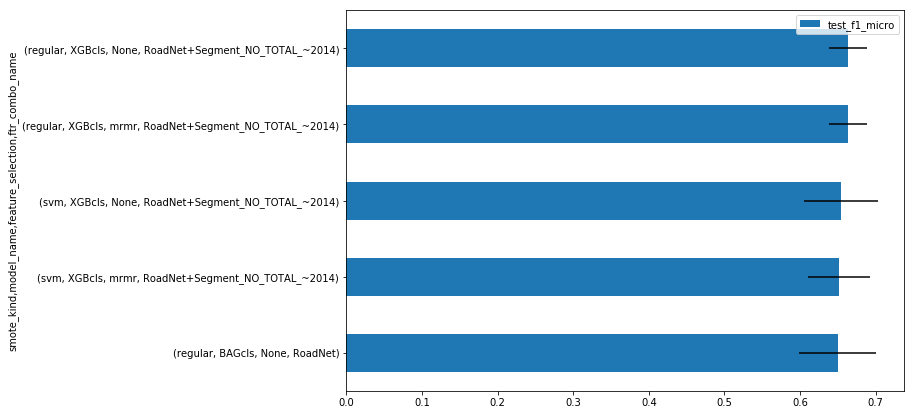

In [36]:
f1_type = f1_choices[2]
print('f1_type =', f1_type)

up_means_to_plot = up_means[[f1_type]].sort_values(f1_type, ascending=True)
up_stds_to_plot = up_stds[[f1_type]]

table_top_n = 5
plot_top_n = 5
up_means_to_plot.iloc[-plot_top_n:].plot(kind='barh', figsize=(10,7), xerr=up_stds_to_plot)
up_means_to_plot.iloc[:-(table_top_n+1):-1,:]

In [21]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

key_cols = ['model_name', 'feature_selection', 'smote_kind']
table = get_paper_table(up_means, f1_type, key_cols)
table.to_csv('deliverables/experiment_1001/EXP3 upsampling table %s.csv' % f1_type, encoding='utf8')
table

f1_type = test_f1_weighted


RoadNet  Segment total  \
model_name feature_selection smote_kind                            
BAGcls     None              regular     0.646238       0.505151   
                             svm         0.623334       0.498085   
           mrmr              regular     0.646238       0.484934   
                             svm         0.623334       0.517128   
           rfecv_linsvc      regular     0.620642       0.463884   
                             svm         0.631424       0.473156   
GDBcls     None              regular     0.614571       0.523703   
                             svm         0.618329       0.516251   
           mrmr              regular     0.614571       0.507752   
                             svm         0.618329       0.520819   
           rfecv_linsvc      regular     0.615223       0.466241   
                             svm         0.627429       0.502538   
XGBcls     None              regular     0.591457       0.521873   
                             svm         0.580810       0.522227   
           mrmr              regular     0.591457       0.505751   
                             svm         0.580810       0.508340   
           rfecv_linsvc      regular     0.596307       0.500303   
                             svm         0.594591       0.506434   

                                         Segment type  RoadNet+Segment total  \
model_name feature_selection smote_kind                                        
BAGcls     None              regular         0.604942               0.624170   
                             svm             0.598525               0.621838   
           mrmr              regular         0.605907               0.628971   
                             svm             0.594149               0.621838   
           rfecv_linsvc      regular         0.583703               0.630611   
                             svm             0.590893               0.616957   
GDBcls     None              regular         0.616089               0.605247   
                             svm             0.615228               0.608838   
           mrmr              regular         0.608437               0.612679   
                             svm             0.610388               0.608838   
           rfecv_linsvc      regular         0.590379               0.623035   
                             svm             0.596546               0.609870   
XGBcls     None              regular         0.594880               0.625204   
                             svm             0.600715               0.618985   
           mrmr              regular         0.601832               0.620724   
                             svm             0.615612               0.618985   
           rfecv_linsvc      regular         0.591661               0.629418   
                             svm             0.568745               0.603030   

                                         RoadNet+Segment type  
model_name feature_selection smote_kind                        
BAGcls     None              regular                 0.639987  
                             svm                     0.621371  
           mrmr              regular                 0.639987  
                             svm                     0.632323  
           rfecv_linsvc      regular                 0.634495  
                             svm                     0.613069  
GDBcls     None              regular                 0.625234  
                             svm                     0.606998  
           mrmr              regular                 0.625234  
                             svm                     0.611481  
           rfecv_linsvc      regular                 0.611577  
                             svm                     0.623112  
XGBcls     None              regular                 0.644303  
                             svm                     0.635111  
           mrmr              regular                 0.6

In [ ]:
on_train_grid_res = get_up_result('upsample_smote', 'grid')

In [ ]:
on_train_grid_res[on_train_grid_res['kind']=='cls'].groupby(keys).mean()[['mean_test']]

# downsample result

In [22]:
from csl_exp3_down_1001 import DOWN_SEEDS

In [26]:
def get_down_result(eval_or_grid):
    res = []

    has_res_cnt = 0
    for seed in SEEDS:
        exp_path = 'experiment_1001/exp3/seed_%d' % seed
        smote_path = '%s/downsample' % (exp_path)

        try:
            df = pd.read_csv('%s/%s_res.csv' % (smote_path, eval_or_grid), index_col=0)
            df['seed'] = seed
            has_res_cnt+=1
            res.append(df)
        except FileNotFoundError:
            print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    print(has_res_cnt)

    return res

In [27]:
down_res = get_down_result('eval')

no eval_res in experiment_1001/exp3/seed_57852/downsample
no eval_res in experiment_1001/exp3/seed_168352/downsample
no eval_res in experiment_1001/exp3/seed_291592/downsample
no eval_res in experiment_1001/exp3/seed_789729423/downsample
6


In [28]:
down_keys = ['model_name', 'feature_selection', 'ftr_combo_name']

In [29]:
down_means = down_res.groupby(down_keys).mean()[f1_choices]
down_stds = down_res.groupby(down_keys).std()[f1_choices]

In [17]:
# down_res.groupby(down_keys).count()[f1_choices]

f1_type = test_f1_weighted


test_f1_weighted
model_name feature_selection ftr_combo_name                                  
GDBcls     None              RoadNet+Segment_NO_TOTAL_~2014           0.36099
           mrmr              RoadNet+Segment_NO_TOTAL_~2014           0.36099

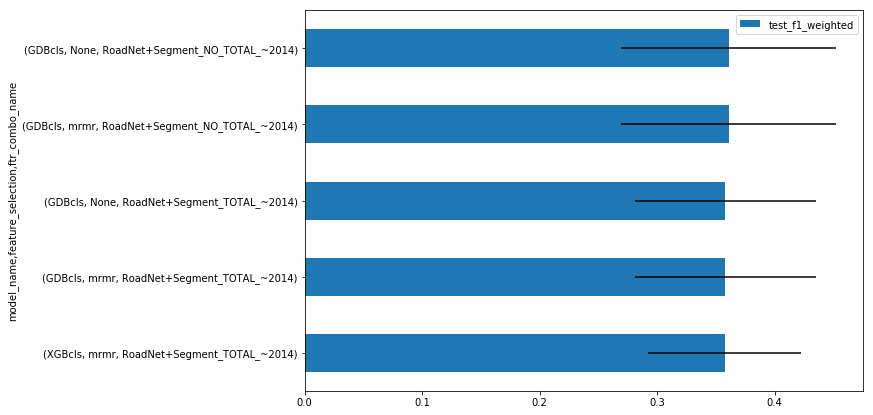

In [31]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

down_means_to_plot = down_means[[f1_type]].sort_values(f1_type, ascending=True)
down_stds_to_plot = down_stds[[f1_type]]

down_means_to_plot.iloc[-5:].plot(kind='barh', figsize=(10,7), xerr=down_stds_to_plot)
down_means_to_plot.iloc[:-3:-1,:]

In [34]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)
key_cols = ['model_name', 'feature_selection']
table = get_paper_table(down_means, f1_type, key_cols)
table.to_csv('deliverables/experiment_1001/EXP3 downsampling table %s.csv' % f1_type, encoding='utf8')

f1_type = test_f1_weighted
